In [1083]:
import os
import sys
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## for classification

In [1084]:
data_names = ['breast_cancer'
             ,'yeast'
             ,'segmentation'
             ,'waveform'
             ,'leaf'
#              ,'wine'
#              ,'crime'
#              ,'airfoil'
#              ,'fire'
#              ,'fish'
             ]
kernel_names = ['linear'
               ,'polynomial'
               ,'hyperbolic_tangent'
               ,'vovks_real_polynomial'
               ,'vovks_infinite_polynomial'
               ,'gaussian'
               ,'laplacian'
               ,'rational_quadratic'
               ,'multiquadratic'
               ,'inverse_multiquadratic'
               ,'circular'
               ,'spherical'
               ,'wave'  
               ,'power'
               ,'log'
               ,'generalized_tstudent'
               ,'anova'
               ,'spline'
               ,'chi_square'
               ,'histogram_intersection'
               ,'hellingers']


In [1085]:
result = pd.DataFrame(columns = ['dataset','kernel','par','train_score','valid_score','valid_std'])

for data_name in data_names:
    
    for kernel_name in kernel_names:
        temp = pd.read_csv('result/' + data_name + '_' + kernel_name + '.csv')
        temp['dataset'] = data_name
        
        result = pd.concat([result,temp], sort = False)
        
result.index = range(len(result))

In [1086]:
k = 0.2

In [1087]:
result['R'] = 1 - (1/k) * result['valid_std'].apply(lambda x:min(k,x))
result['C-score'] = result['valid_score']**2 + 1 - 2 * result['valid_score'] * 1 * result['R'] 
result['C-score'] = result['C-score'].apply(lambda x : np.sqrt(x))
result.loc[result['R'] == 0,'C-score'] = 100

In [1088]:
result.head()

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
0,breast_cancer,linear,0,0.973,0.968,0.021,0.893,0.456
1,breast_cancer,polynomial,2,0.983,0.946,0.023,0.886,0.467
2,breast_cancer,polynomial,5,1.000,0.928,0.028,0.858,0.518
3,breast_cancer,polynomial,8,1.000,0.821,0.038,0.809,0.588
4,breast_cancer,hyperbolic_tangent,0,0.952,0.956,0.029,0.853,0.533


In [1089]:
temp = result.sort_values('C-score', ascending=True).drop_duplicates(['dataset','kernel'])
temp.index = range(len(temp))

In [1090]:
temp.head()

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
0,waveform,anova,5.000,1.000,0.834,0.005,0.973,0.271
1,waveform,laplacian,5.000,0.885,0.869,0.009,0.953,0.314
2,waveform,log,8,1.000,0.852,0.010,0.952,0.323
3,breast_cancer,power,2.000,0.973,0.968,0.011,0.946,0.326
4,waveform,wave,5.000,0.875,0.869,0.011,0.947,0.331


In [1096]:
temp[temp['dataset'] == 'segmentation']

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
42,segmentation,gaussian,5.000,0.905,0.867,0.042,0.792,0.614
49,segmentation,histogram_intersection,0,0.991,0.933,0.044,0.782,0.642
50,segmentation,linear,0,0.948,0.900,0.045,0.775,0.644
53,segmentation,anova,5.000,1.000,0.938,0.048,0.761,0.673
55,segmentation,vovks_real_polynomial,2,0.950,0.900,0.050,0.751,0.676
58,segmentation,inverse_multiquadratic,1,0.963,0.886,0.053,0.735,0.695
62,segmentation,log,2,0.971,0.890,0.057,0.717,0.718
64,segmentation,power,2.200,0.910,0.886,0.061,0.695,0.744
66,segmentation,polynomial,5,1.000,0.838,0.065,0.677,0.753
67,segmentation,rational_quadratic,1,0.975,0.848,0.067,0.667,0.767


In [1097]:
results = pd.DataFrame(columns = ['dataset'] + kernel_names)
results['dataset'] = data_names

for data_name in data_names:
    for kernel_name in kernel_names:

        condition1 = temp['dataset'] == data_name
        condition2 = temp['kernel'] == kernel_name
        if round(temp.loc[condition1 & condition2,'valid_score'],4).values[0] != -1:
            results.loc[results['dataset'] == data_name,kernel_name] = str(round(temp.loc[condition1 & condition2,'valid_score'],4).values[0]) + '/' + str(round(temp.loc[condition1 & condition2,'R'],4).values[0])
        else:
            results.loc[results['dataset'] == data_name,kernel_name] = '0/0'

In [1098]:
results.to_csv('result/classification.csv',index = False)

In [1099]:
results

,dataset,linear,polynomial,hyperbolic_tangent,vovks_real_polynomial,vovks_infinite_polynomial,gaussian,laplacian,rational_quadratic,multiquadratic,...,spherical,wave,power,log,generalized_tstudent,anova,spline,chi_square,histogram_intersection,hellingers
0,breast_cancer,0.9678/0.8929,0.9458/0.8862,0.956/0.8526,0.9663/0.8963,0.3382/0.6433,0.9708/0.9273,0.9561/0.9349,0.9707/0.9429,0.3015/0.7977,...,0.9605/0.8737,0.9692/0.8841,0.9678/0.9456,0.9546/0.8753,0.962/0.9063,0.978/0.9177,0.9152/0.839,0.319/0.7368,0.9663/0.8689,0/0
1,yeast,0.5842/0.7805,0.4474/0.8473,0.3227/0.8462,0.5808/0.8816,0.2102/0.8974,0.5923/0.8186,0.5546/0.8282,0.6085/0.803,0.153/0.8983,...,0.6065/0.8535,0.5653/0.8122,0.4778/0.8549,0.5802/0.8521,0.5762/0.8922,0.5505/0.8713,0.3132/0.7949,0.2345/0.8251,0.6139/0.8254,0/0
2,segmentation,0.9/0.7754,0.8381/0.677,0.4333/0.6095,0.9/0.7514,0.0381/0.8218,0.8667/0.7924,0.8476/0.6342,0.8476/0.6667,0.0/1.0,...,0.8524/0.6095,0.4667/0.5768,0.8857/0.6951,0.8905/0.7173,0.7714/0.6342,0.9381/0.7607,0.819/0.6342,0.0333/0.8909,0.9333/0.7818,0/0
3,waveform,0.8694/0.9181,0.8188/0.9366,0.754/0.8761,0.8124/0.9346,0.1384/0.9161,0.8692/0.931,0.8688/0.9531,0.8638/0.9311,0.0162/0.9798,...,0.847/0.9338,0.8694/0.9469,0.8706/0.9456,0.8524/0.9517,0.8602/0.9218,0.8336/0.9725,0.5702/0.8713,0.3902/0.8881,0.8454/0.944,0/0
4,leaf,0.7441/0.5301,0.6971/0.7055,0.0706/0.7799,0.5882/0.721,0.0147/0.9013,0.6147/0.5766,0.3912/0.5735,0.6088/0.589,0.0059/0.9412,...,0.6265/0.6395,0.5559/0.5817,0.7176/0.7353,0.7206/0.8644,0.4382/0.6815,0.7029/0.71,0.2118/0.4872,0.0059/0.9412,0.7265/0.7814,0/0


In [1100]:
result_cls = result.copy()

## for regression

In [1101]:
data_names = [#'breast_cancer'
#             ,'yeast'
#             ,'segmentation'
#             ,'waveform'
#             ,'leaf'
             'wine'
             ,'crime'
             ,'airfoil'
             ,'fire'
             ,'fish'
             ]
kernel_names = ['linear'
               ,'polynomial'
               ,'hyperbolic_tangent'
               ,'vovks_real_polynomial'
               ,'vovks_infinite_polynomial'
               ,'gaussian'
               ,'laplacian'
               ,'rational_quadratic'
               ,'multiquadratic'
               ,'inverse_multiquadratic'
               ,'circular'
               ,'spherical'
               ,'wave'  
               ,'power'
               ,'log'
               ,'generalized_tstudent'
               ,'anova'
               ,'spline'
               ,'chi_square'
               ,'histogram_intersection'
               ,'hellingers']


In [1102]:
result = pd.DataFrame(columns = ['dataset','kernel','par','train_score','valid_score','valid_std'])

for data_name in data_names:
    
    for kernel_name in kernel_names:
        temp = pd.read_csv('result/' + data_name + '_' + kernel_name + '.csv')
        temp['dataset'] = data_name
        
        result = pd.concat([result,temp], sort = False)
result.index = range(len(result))

In [1103]:
result.loc[result['valid_score'] == -1,'valid_score'] = 3
result['valid_score'] = result['valid_score'].apply(lambda x : max(0,3-x))

In [1104]:
result['R'] = 1 - 5 * result['valid_std'].apply(lambda x:min(0.2,x))
result['C-score'] = result['valid_score']**2 + 3**2 - 2 * result['valid_score'] * 3 * result['R']
result['C-score'] = result['C-score'].apply(lambda x : np.sqrt(x))
result.loc[result['R'] == 0,'C-score'] = 100

In [1105]:
result

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
0,wine,linear,0,0.645,2.344,0.084,0.581,2.514
1,wine,polynomial,2,1.446,1.515,0.251,0.000,100.000
2,wine,polynomial,5,756.228,0.000,6531.407,0.000,100.000
3,wine,polynomial,8,315166.939,0.000,4639952262.075,0.000,100.000
4,wine,hyperbolic_tangent,0,12760.814,0.000,1480.934,0.000,100.000
5,wine,vovks_real_polynomial,2,0.646,2.341,0.095,0.524,2.670
6,wine,vovks_real_polynomial,5,98.038,0.000,549.062,0.000,100.000
7,wine,vovks_real_polynomial,8,1134126.797,0.000,616768.389,0.000,100.000
8,wine,vovks_infinite_polynomial,0,124293661.612,0.000,187481493.807,0.000,100.000
9,wine,gaussian,0.500,0.326,2.240,0.095,0.526,2.635


In [1106]:
temp = result.sort_values('C-score').drop_duplicates(['dataset','kernel'])
temp.index = range(len(temp))

In [1107]:
temp.head()

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
0,airfoil,anova,1.000,0.123,2.858,0.017,0.916,1.211
1,airfoil,rational_quadratic,1,0.161,2.804,0.020,0.899,1.318
2,airfoil,laplacian,0.500,0.150,2.763,0.022,0.889,1.380
3,airfoil,gaussian,1.000,0.175,2.801,0.026,0.871,1.483
4,airfoil,spherical,5.000,0.175,2.791,0.027,0.866,1.513


In [1118]:
temp[temp['dataset'] == 'airfoil']

,dataset,kernel,par,train_score,valid_score,valid_std,R,C-score
0,airfoil,anova,1.000,0.123,2.858,0.017,0.916,1.211
1,airfoil,rational_quadratic,1,0.161,2.804,0.020,0.899,1.318
2,airfoil,laplacian,0.500,0.150,2.763,0.022,0.889,1.380
3,airfoil,gaussian,1.000,0.175,2.801,0.026,0.871,1.483
4,airfoil,spherical,5.000,0.175,2.791,0.027,0.866,1.513
5,airfoil,log,2,0.156,2.816,0.027,0.864,1.525
8,airfoil,generalized_tstudent,2,0.161,2.803,0.034,0.828,1.712
9,airfoil,inverse_multiquadratic,1,0.182,2.791,0.035,0.827,1.715
10,airfoil,wave,1.000,0.261,2.728,0.036,0.822,1.727
17,airfoil,vovks_real_polynomial,2,0.488,2.507,0.048,0.758,1.969


In [1022]:
results = pd.DataFrame(columns = ['dataset'] + kernel_names)
results['dataset'] = data_names

for data_name in data_names:
    for kernel_name in kernel_names:
        try:
            condition1 = temp['dataset'] == data_name
            condition2 = temp['kernel'] == kernel_name
            results.loc[results['dataset'] == data_name,kernel_name] = str(round(temp.loc[condition1 & condition2,'valid_score'],4).values[0]) + '/' + str(round(temp.loc[condition1 & condition2,'R'],4).values[0])
        except:
            results.loc[results['dataset'] == data_name,kernel_name] = '0/0'

In [1023]:
results.to_csv('result/regression.csv',index = False)

In [1024]:
results

,dataset,linear,polynomial,hyperbolic_tangent,vovks_real_polynomial,vovks_infinite_polynomial,gaussian,laplacian,rational_quadratic,multiquadratic,...,spherical,wave,power,log,generalized_tstudent,anova,spline,chi_square,histogram_intersection,hellingers
0,wine,2.3444/0.5813,1.5149/0.0,0.0/0.0,2.3414/0.5235,0.0/0.0,2.3569/0.5919,2.4254/0.6237,2.4109/0.6509,0.0/0.0,...,2.1518/0.7091,2.36/0.4682,2.3399/0.678,2.4578/0.7928,2.3206/0.6564,2.3876/0.7387,0.0/0.0,0.0/0.0,2.3718/0.3948,0.0/1.0
1,crime,2.6027/0.7703,2.2077/0.2321,0.0/0.0,2.6083/0.7541,0.0/0.0,2.5733/0.7527,2.641/0.8405,2.6423/0.807,0.0/0.0,...,2.0041/0.5145,0.0/0.0,2.5397/0.7133,2.6185/0.7477,2.3369/0.7148,2.5983/0.7801,0.0/1.0,0.0/0.0,2.5774/0.8376,0.0/1.0
2,airfoil,2.5052/0.7251,2.3264/0.5264,0.0/0.0,2.5068/0.7585,0.0/0.0,2.8008/0.8714,2.7627/0.8885,2.8035/0.899,0.0/0.0,...,2.7909/0.866,2.7281/0.8223,2.5038/0.6531,2.8162/0.8644,2.8031/0.828,2.8575/0.9156,0.0/0.0,0.0/0.0,2.5631/0.5835,0.0/1.0
3,fire,1.9246/0.0,0.0/0.0,0.0/0.0,0.0/0.0,0.0/0.0,1.9338/0.0,1.9188/0.0,1.9255/0.0,0.0/0.0,...,1.8853/0.0,1.9178/0.0,0.0/0.0,1.8001/0.0,1.8784/0.0,0.6349/0.0,0.0/0.0,0.0/0.0,1.944/0.0,0.0/1.0
4,fish,2.5704/0.4552,2.1931/0.2458,0.0/0.0,2.5676/0.4236,0.0/0.0,2.6173/0.6347,2.6364/0.666,2.6372/0.6916,0.0/0.0,...,2.6328/0.4828,2.5807/0.7717,2.5708/0.3421,2.6343/0.5814,2.6225/0.4496,2.5599/0.4717,0.0/0.0,0.0/0.0,2.5854/0.633,0.0/1.0


In [1025]:
result_reg = result.copy()

## for all

In [1026]:
from collections import Counter

In [1027]:
data_names = ['breast_cancer'
             ,'yeast'
             ,'segmentation'
             ,'waveform'
             ,'leaf'
             'wine'
             ,'crime'
             ,'airfoil'
             ,'fire'
             ,'fish']

In [1028]:
top_n = 10

In [1029]:
result_cls = result_cls.loc[result_cls['R'] != 0,:].copy()
result_cls = result_cls.loc[result_cls['valid_std'] != 0,:].copy()
result_cls = result_cls.sort_values('C-score').drop_duplicates(['dataset','kernel'])
result_cls.index = range(len(result_cls))

kernel_rank = []
for dataname in data_names[0:5]:
    kernel_rank = kernel_rank + list(result_cls.loc[result_cls['dataset'] == dataname,'kernel'][0:top_n])
    
rank_cls = dict(Counter(kernel_rank))

In [1030]:
result_reg = result_reg.loc[result_reg['R'] != 0,:].copy()
result_reg = result_reg.loc[result_reg['valid_std'] != 0,:].copy()
result_reg = result_reg.sort_values('C-score').drop_duplicates(['dataset','kernel'])
result_reg.index = range(len(result_reg))

kernel_rank = []
for dataname in data_names[4:]:
    kernel_rank = kernel_rank + list(result_reg.loc[result_reg['dataset'] == dataname,'kernel'][0:top_n])
    
rank_reg = dict(Counter(kernel_rank))

In [1031]:
table = pd.DataFrame({'kernel' : kernel_names,
              'cls_count' : range(len(kernel_names)),
              'reg_count' : range(len(kernel_names)),
              'total_count' : range(len(kernel_names))})

In [1032]:
rank_cls

{'power': 3,
 'rational_quadratic': 4,
 'laplacian': 3,
 'inverse_multiquadratic': 3,
 'gaussian': 4,
 'anova': 4,
 'generalized_tstudent': 2,
 'circular': 1,
 'vovks_real_polynomial': 3,
 'linear': 2,
 'spherical': 2,
 'log': 3,
 'histogram_intersection': 3,
 'polynomial': 2,
 'wave': 1}

In [1033]:
for kernel in kernel_names:
    try:
        condition = table['kernel'] == kernel
        table.loc[condition,'cls_count'] = rank_cls[kernel]
    except:
        table.loc[condition,'cls_count'] = 0
    try:
        condition = table['kernel'] == kernel
        table.loc[condition,'reg_count'] = rank_reg[kernel]
    except:
        table.loc[condition,'reg_count'] = 0


In [1034]:
table['total_count'] = table['cls_count'] + table['reg_count']

In [1035]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [1036]:
table = table.sort_values('total_count',ascending = False)

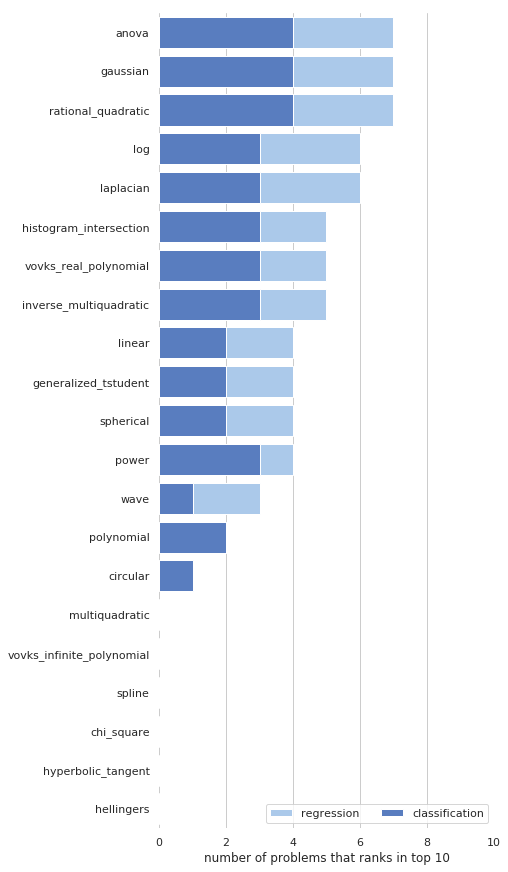

In [1037]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_count", y="kernel", data=table,
            label="regression", color="b")

# Plot the crashes where alcohol was involved\
sns.set_color_codes("muted")
sns.barplot(x="cls_count", y="kernel", data=table,
            label="classification", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="number of problems that ranks in top 10")
sns.despine(left=True, bottom=True)